## wavelength = 435nm

In [1]:
from df_maker import df, files
from astropy.io import fits
from df_maker import datas, drc
from aperture_sum import ap_sum

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.colors as colors
import numpy as np
from photutils.aperture import CircularAperture

from astropy.visualization import ImageNormalize, ManualInterval
from matplotlib import pyplot as plt

from datetime import datetime


import matplotlib.dates as md


/Users/iman/Documents/47project/flcs/IBJ203010/ic2r01i1q_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ic2r01isq_skymatch_mask_sci2.fits
/Users/iman/Documents/47project/flcs/IBJ203010/id5v02i8q_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ibj203gyq_flc.fits
/Users/iman/Documents/47project/flcs/IBJ203010/iby404jwq_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ic2r02jmq_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ibj203gwq_sci1_blt.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ibj203gqq_sci1_final_mask.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ic2r01i5q_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/id5v02hzq_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ic2r01j2q_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ibj203gqq_sci2_single_mask.fits
/Users/iman/Documents/47project/flcs/IBJ203010/j6ll01xzq_s

In [2]:
w = 435 # wavelength

In [3]:
# from astropy.time import Time
# t1 = Time(df['Times'].to_list(),format = 'iso')
# df['Time as Object']=t1
# df.sort_values(by = 'Filter nm', inplace = True)

In [4]:
s1_coords = df.loc[(df['Filter nm'] == w)]['Star 1'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_s1 = CircularAperture(s1_coords, r=3.0) # star 1 aperture in 435nm data
sumstar1 = ap_sum(df, w,datas,ap435_s1)

s2_coords = df.loc[(df['Filter nm'] == w)]['Star 2'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_s2 = CircularAperture(s2_coords, r=3.0) # star 2 aperture in 435nm data
sumstar2 = ap_sum(df, w,datas,ap435_s2)

s3_coords = df.loc[(df['Filter nm'] == w)]['Star 3'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_s3 = aperture = CircularAperture(s3_coords, r=3.0)
sumstar3 = ap_sum(df, w,datas,ap435_s3)

s4_coords = df.loc[(df['Filter nm'] == w)]['Star 4'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_s4 = CircularAperture(s4_coords, r=3.0)
sumstar4 = ap_sum(df, w,datas,ap435_s4)

s_coords = df.loc[(df['Filter nm'] == w)]['Coordinates'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_source = CircularAperture(s_coords, r=3.0)
sumstar_s = ap_sum(df, w,datas,ap435_source)

18 435
21 435
24 435
[240.97371648218453, 243.36764149213772, 232.83857264772877]
18 435
21 435
24 435
[120.26344727965821, 123.38175818117563, 118.71841538080076]
18 435
21 435
24 435
[2274.9469241017996, 2241.0470951310895, 2296.488713322942]
18 435
21 435
24 435
[299.7769324429159, 282.7328925489973, 298.7188020476797]
18 435
21 435
24 435
[68.26395853637747, 54.60497126862944, 56.6356702184948]


In [9]:
df.loc[(df['Filter nm'] == w)]
df_w = pd.DataFrame({"Filename": df.loc[(df['Filter nm'] == w)]['Filename'], "Filter nm": df.loc[(df['Filter nm'] == w)]['Filter nm'], 
                      "Times": df.loc[(df['Filter nm'] == w)]['Times'],"Time as Object": df.loc[(df['Filter nm'] == w)]['Time as Object'],
                      "Day": df.loc[(df['Filter nm'] == w)]['Day'],"Coordinates": df.loc[(df['Filter nm'] == w)]['Coordinates'], 
                      "Exposure": df.loc[(df['Filter nm'] == w)]['Exposure'],
                     "Star 1 Flux": sumstar1, "Star 2 Flux": sumstar2, "Star 3 Flux": sumstar3, "Star 4 Flux": sumstar4,
                     "Source Flux": sumstar_s})
df_w.sort_values(by=['Filter nm'], ascending=True, inplace=True)
df_w

,Filename,Filter nm,Times,Time as Object,Day,Coordinates,Exposure,Star 1 Flux,Star 2 Flux,Star 3 Flux,Star 4 Flux,Source Flux
24,J8FW01010,435,2002-09-30 3:01:19,2002-09-30 03:02:23.184,30,"(3387.0834, 2165.663)",300,240.973716,120.263447,2274.946924,299.776932,68.263959
27,J8FW02010,435,2002-10-02 22:18:11,2002-10-02 22:19:15.184,2,"(3387.3698, 2165.9535)",310,243.367641,123.381758,2241.047095,282.732893,54.604971
30,J8FW03010,435,2002-10-11 8:27:42,2002-10-11 08:28:46.184,11,"(3387.3948, 2165.8143)",345,232.838573,118.718415,2296.488713,298.718802,56.635670


In [10]:
# add relative magnitudes
#relative magnitudes of candidate
df_w['S1-Source Mag'] = 2.5 * ( np.log10(sumstar1) - np.log10(sumstar_s))
df_w['S2-Source Mag'] = 2.5 * ( np.log10(sumstar2) - np.log10(sumstar_s))
df_w['S3-Source Mag'] =  2.5 * ( np.log10(sumstar3) - np.log10(sumstar_s))
df_w['S4-Source Mag'] = 2.5 * ( np.log10(sumstar4) - np.log10(sumstar_s))
#total flux of stars
df_w['S1 Mag'] = 2.5*np.log10(sumstar1)
df_w['S2 Mag'] = 2.5 *np.log10(sumstar2)
df_w['S3 Mag'] = 2.5 * np.log10(sumstar3)
df_w['S4 Mag'] = 2.5 * np.log10(sumstar4)
df_w['Source Mag'] = 2.5 * np.log10(sumstar_s)
#relative magnitudes of background stars
df_w['S1-S2 Mag'] = 2.5 * ( np.log10(sumstar1) - np.log10(sumstar2))
df_w['S1-S3 Mag'] = 2.5 * ( np.log10(sumstar1) - np.log10(sumstar3))
df_w['S1-S4 Mag'] = s1s4 = 2.5 * ( np.log10(sumstar1) - np.log10(sumstar4))
df_w['S2-S3 Mag'] = 2.5 * ( np.log10(sumstar2) - np.log10(sumstar3))
df_w['S2-S4 Mag'] = s2s4 = 2.5 * ( np.log10(sumstar2) - np.log10(sumstar4))
df_w['S4-S3 Mag'] = s4s3 = 2.5 * ( np.log10(sumstar4) - np.log10(sumstar3))

In [23]:
df_w

,Filename,Filter nm,Times,Time as Object,Day,Coordinates,Exposure,Star 1 Flux,Star 2 Flux,Star 3 Flux,Star 4 Flux,Source Flux,S1-Source Mag,S2-Source Mag,S3-Source Mag,S4-Source Mag,S1 Mag,S2 Mag,S3 Mag,S4 Mag,Source Mag,S1-S2 Mag,S1-S3 Mag,S1-S4 Mag,S2-S3 Mag,S2-S4 Mag,S4-S3 Mag
24,J8FW01010,435,2002-09-30 3:01:19,2002-09-30 03:02:23.184,30,"(3387.0834, 2165.663)",300,240.973716,120.263447,2274.946924,299.776932,68.263959,1.369446,0.614855,3.806949,1.606517,5.954924,5.200334,8.392428,6.191996,4.585479,0.754590,-2.437504,-0.237071,-3.192094,-0.991661,-2.200433
27,J8FW02010,435,2002-10-02 22:18:11,2002-10-02 22:19:15.184,2,"(3387.3698, 2165.9535)",310,243.367641,123.381758,2241.047095,282.732893,54.604971,1.622577,0.885047,4.033047,1.785360,5.965657,5.228127,8.376127,6.128441,4.343080,0.737530,-2.410470,-0.162784,-3.148000,-0.900313,-2.247687
30,J8FW03010,435,2002-10-11 8:27:42,2002-10-11 08:28:46.184,11,"(3387.3948, 2165.8143)",345,232.838573,118.718415,2296.488713,298.718802,56.635670,1.534912,0.803570,4.019936,1.805431,5.917637,5.186295,8.402661,6.188156,4.382725,0.731342,-2.485023,-0.270519,-3.216366,-1.001861,-2.214504


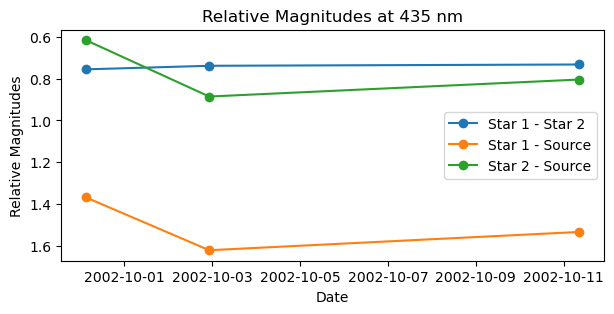

In [22]:
fig,ax = plt.subplots(nrows = 1, ncols=1, figsize = (7,3))#, subplot_kw={'projection': wcs})
        
ax.set_title('Relative Magnitudes at 435 nm')
ax.plot(df_w['Time as Object'], df_w['S1-S2 Mag'], label = 'Star 1 - Star 2',marker = 'o')
ax.plot(df_w['Time as Object'], df_w['S1-Source Mag'], label = 'Star 1 - Source', marker = 'o')
ax.plot(df_w['Time as Object'], df_w['S2-Source Mag'], label = 'Star 2 - Source',marker = 'o')

ax.set_ylabel("Relative Magnitudes")
ax.set_xlabel("Date")

ax.invert_yaxis()

ax.legend()